# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

 <h2>Camilo Angarita: 201111642
    <br>
 Carolina Padilla: 201111402 
    <br>
 Jaime Orjuela: 201924252
    <br>
 David Tavera: 201016123
    </h2>

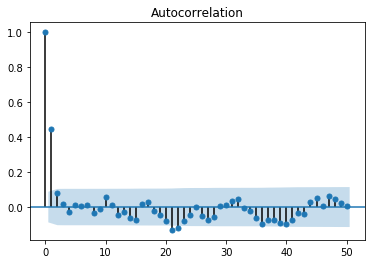

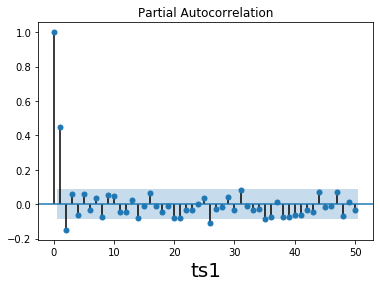

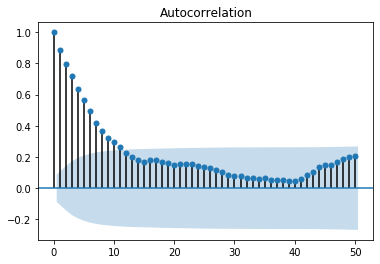

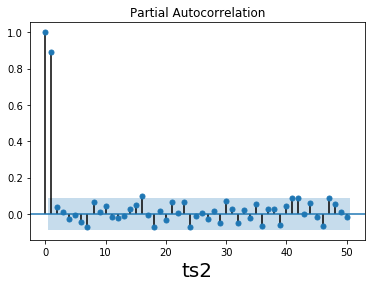

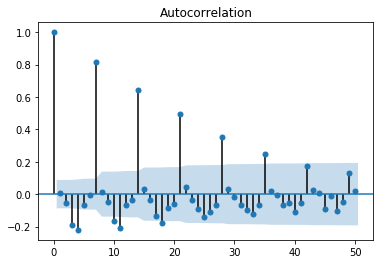

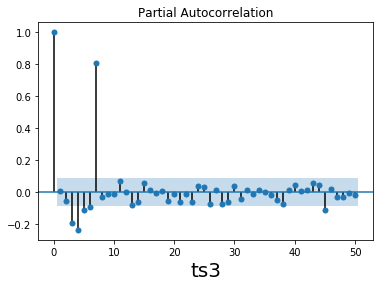

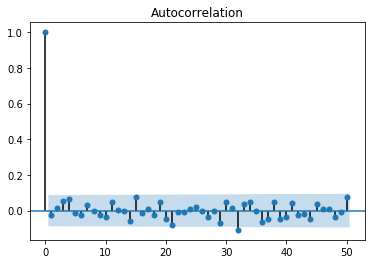

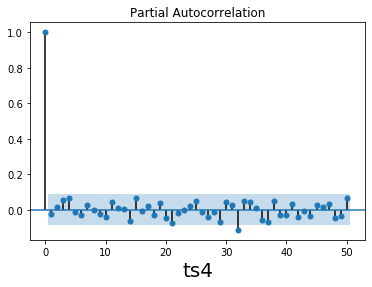

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('../datasets/data_arma.csv', index_col=0)
df.head()

cols = ['ts1','ts2','ts3','ts4']


for c in cols:
    plot_acf(df[c], lags=50 );
    plot_pacf(df[c], lags=50);
    plt.xlabel(c, fontsize=20);



ts1: MA orden 1 <br>
ts2: AR orden 1 <br>
ts3: AR orden 7 <br>
ts4: Random <br>

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')


series = pd.read_csv('../datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


In [31]:
X = series.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]

len(test)

18

In [28]:
p_list = range(5)
d_list = range(5)
q_list = range(5)
max_error=999999
p_best=0
d_best=0
q_best=0

for p in p_list:
    for d in d_list:
        for q in q_list:
            
            history = [x for x in train]
            predictions = list()
            print('p:',p,'d:',d,'q:',q)
            try:
                for t in range(len(test)):
                    model = ARIMA(history, order=(p,d,q))
                    model_fit = model.fit(disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    obs = test[t]
                    history.append(obs)
                    #print('predicted=%f, expected=%f' % (yhat, obs))

                error = mean_squared_error(test, predictions)**0.5

                if error < max_error:
                    max_error=error
                    p_best=p
                    d_best=d
                    q_best=q
            except:
                print('no lo logre')
            



p: 0 d: 0 q: 0
p: 0 d: 0 q: 1
p: 0 d: 0 q: 2
p: 0 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\stats

p: 0 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\

no lo logre
p: 0 d: 1 q: 0
p: 0 d: 1 q: 1
p: 0 d: 1 q: 2
no lo logre
p: 0 d: 1 q: 3
no lo logre
p: 0 d: 1 q: 4
no lo logre
p: 0 d: 2 q: 0
p: 0 d: 2 q: 1
p: 0 d: 2 q: 2
no lo logre
p: 0 d: 2 q: 3
no lo logre
p: 0 d: 2 q: 4
no lo logre
p: 0 d: 3 q: 0
no lo logre
p: 0 d: 3 q: 1
no lo logre
p: 0 d: 3 q: 2
no lo logre
p: 0 d: 3 q: 3
no lo logre
p: 0 d: 3 q: 4
no lo logre
p: 0 d: 4 q: 0
no lo logre
p: 0 d: 4 q: 1
no lo logre
p: 0 d: 4 q: 2
no lo logre
p: 0 d: 4 q: 3
no lo logre
p: 0 d: 4 q: 4
no lo logre
p: 1 d: 0 q: 0
p: 1 d: 0 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


no lo logre
p: 1 d: 0 q: 2
no lo logre
p: 1 d: 0 q: 3
no lo logre
p: 1 d: 0 q: 4
no lo logre
p: 1 d: 1 q: 0
p: 1 d: 1 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p: 1 d: 1 q: 2
no lo logre
p: 1 d: 1 q: 3
no lo logre
p: 1 d: 1 q: 4
no lo logre
p: 1 d: 2 q: 0
p: 1 d: 2 q: 1
no lo logre
p: 1 d: 2 q: 2
no lo logre
p: 1 d: 2 q: 3
no lo logre
p: 1 d: 2 q: 4
no lo logre
p: 1 d: 3 q: 0
no lo logre
p: 1 d: 3 q: 1
no lo logre
p: 1 d: 3 q: 2
no lo logre
p: 1 d: 3 q: 3
no lo logre
p: 1 d: 3 q: 4
no lo logre
p: 1 d: 4 q: 0
no lo logre
p: 1 d: 4 q: 1
no lo logre
p: 1 d: 4 q: 2
no lo logre
p: 1 d: 4 q: 3
no lo logre
p: 1 d: 4 q: 4
no lo logre
p: 2 d: 0 q: 0
p: 2 d: 0 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda

no lo logre
p: 2 d: 0 q: 2
no lo logre
p: 2 d: 0 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)


no lo logre
p: 2 d: 0 q: 4
no lo logre
p: 2 d: 1 q: 0
p: 2 d: 1 q: 1
no lo logre
p: 2 d: 1 q: 2
no lo logre
p: 2 d: 1 q: 3
no lo logre
p: 2 d: 1 q: 4
no lo logre
p: 2 d: 2 q: 0
p: 2 d: 2 q: 1
no lo logre
p: 2 d: 2 q: 2
no lo logre
p: 2 d: 2 q: 3
no lo logre
p: 2 d: 2 q: 4
no lo logre
p: 2 d: 3 q: 0
no lo logre
p: 2 d: 3 q: 1
no lo logre
p: 2 d: 3 q: 2
no lo logre
p: 2 d: 3 q: 3
no lo logre
p: 2 d: 3 q: 4
no lo logre
p: 2 d: 4 q: 0
no lo logre
p: 2 d: 4 q: 1
no lo logre
p: 2 d: 4 q: 2
no lo logre
p: 2 d: 4 q: 3
no lo logre
p: 2 d: 4 q: 4
no lo logre
p: 3 d: 0 q: 0


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 3 d: 0 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


no lo logre
p: 3 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


no lo logre
p: 3 d: 0 q: 3
no lo logre
p: 3 d: 0 q: 4
no lo logre
p: 3 d: 1 q: 0
p: 3 d: 1 q: 1
p: 3 d: 1 q: 2
no lo logre
p: 3 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)


no lo logre
p: 3 d: 1 q: 4
no lo logre
p: 3 d: 2 q: 0
p: 3 d: 2 q: 1
no lo logre
p: 3 d: 2 q: 2
no lo logre
p: 3 d: 2 q: 3
no lo logre
p: 3 d: 2 q: 4
no lo logre
p: 3 d: 3 q: 0
no lo logre
p: 3 d: 3 q: 1
no lo logre
p: 3 d: 3 q: 2
no lo logre
p: 3 d: 3 q: 3
no lo logre
p: 3 d: 3 q: 4
no lo logre
p: 3 d: 4 q: 0
no lo logre
p: 3 d: 4 q: 1
no lo logre
p: 3 d: 4 q: 2
no lo logre
p: 3 d: 4 q: 3
no lo logre
p: 3 d: 4 q: 4
no lo logre
p: 4 d: 0 q: 0
no lo logre
p: 4 d: 0 q: 1
no lo logre
p: 4 d: 0 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


no lo logre
p: 4 d: 0 q: 3
no lo logre
p: 4 d: 0 q: 4


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


no lo logre
p: 4 d: 1 q: 0
p: 4 d: 1 q: 1
p: 4 d: 1 q: 2
no lo logre
p: 4 d: 1 q: 3


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


no lo logre
p: 4 d: 1 q: 4
no lo logre
p: 4 d: 2 q: 0
p: 4 d: 2 q: 1


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p: 4 d: 2 q: 2


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\david\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


no lo logre
p: 4 d: 2 q: 3
no lo logre
p: 4 d: 2 q: 4
no lo logre
p: 4 d: 3 q: 0
no lo logre
p: 4 d: 3 q: 1
no lo logre
p: 4 d: 3 q: 2
no lo logre
p: 4 d: 3 q: 3
no lo logre
p: 4 d: 3 q: 4
no lo logre
p: 4 d: 4 q: 0
no lo logre
p: 4 d: 4 q: 1
no lo logre
p: 4 d: 4 q: 2
no lo logre
p: 4 d: 4 q: 3
no lo logre
p: 4 d: 4 q: 4
no lo logre


C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [29]:
print('Test MSE: %.3f' % max_error)
print('p:',p_best,'d:',d_best,'q:',q_best)


Test MSE: 66.900
p: 4 d: 2 q: 1


In [43]:
history = [x for x in train]
predictions = list()
interval_low=list()
interval_high=list()

for t in range(len(test)):
    model_best = ARIMA(history, order=(p_best,d_best,q_best))
    model_fit_best = model_best.fit(disp=0)
    output_best = model_fit_best.forecast()
    yhat_best = output_best[0]
    predictions.append(yhat_best)
    interval_low.append(output_best[2][0][0])
    interval_high.append(output_best[2][0][1])
    obs_best = test[t]
    history.append(obs_best)

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


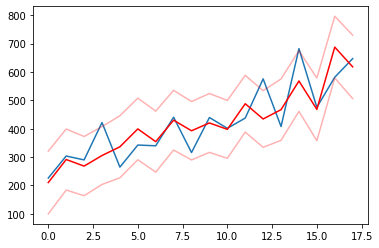

In [45]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.plot(interval_low, color='red',alpha=0.3)
plt.plot(interval_high, color='red',alpha=0.3)
plt.show()